In [13]:
# # Split data
# import shutil
# import os
# from tqdm import tqdm
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import image_dataset_from_directory

# os.makedirs('data', exist_ok=True)
# os.makedirs('data/train', exist_ok=True)
# os.makedirs('data/test', exist_ok=True)
# os.makedirs('data/val', exist_ok=True)

# # Split data
# IMAGES_PATH = 'images'
# for category in os.listdir(IMAGES_PATH):
#     if category.startswith('.'):
#         continue
#     os.makedirs(f'data/train/{category}', exist_ok=True)
#     os.makedirs(f'data/test/{category}', exist_ok=True)
#     os.makedirs(f'data/val/{category}', exist_ok=True)
#     images = os.listdir(f'{IMAGES_PATH}/{category}')
    
#     train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
#     train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)
#     current_image_number = 0
#     for image in train_images:
#         if image.startswith('.'):
#             continue
#         image_name = category + str(current_image_number) + '.jpg'
#         shutil.copy(f'{IMAGES_PATH}/{category}/{image}', f'data/train/{category}/{image_name}')
#         current_image_number += 1
        
#     for image in val_images:
#         if image.startswith('.'):
#             continue
#         image_name = category + str(current_image_number) + '.jpg'
#         shutil.copy(f'{IMAGES_PATH}/{category}/{image}', f'data/val/{category}/{image_name}')
#         current_image_number += 1
        
#     for image in test_images:
#         if image.startswith('.'):
#             continue
#         image_name = category + str(current_image_number) + '.jpg'
#         shutil.copy(f'{IMAGES_PATH}/{category}/{image}', f'data/test/{category}/{image_name}')
#         current_image_number += 1
    

In [80]:
import pandas as pd
import os

data_dir = 'data'
image_paths = []
labels = []


for category in os.listdir(f'{data_dir}/train'):
    if category.startswith('.'):
        continue
    for image in os.listdir(f'{data_dir}/train/{category}'):
        image_paths.append(f'{data_dir}/train/{category}/{image}')
        labels.append(category.split('__')[1])      # Plant disease

train_df = pd.DataFrame({'filename': image_paths, 'label': labels})

image_paths = []
labels = []

for category in os.listdir(f'{data_dir}/val'):
    if category.startswith('.'):
        continue
    for image in os.listdir(f'{data_dir}/val/{category}'):
        image_paths.append(f'{data_dir}/val/{category}/{image}')
        labels.append(category.split('__')[1])      # Plant disease

val_df = pd.DataFrame({'filename': image_paths, 'label': labels})

image_paths = []
labels = []

for category in os.listdir(f'{data_dir}/test'):
    if category.startswith('.'):
        continue
    for image in os.listdir(f'{data_dir}/test/{category}'):
        image_paths.append(f'{data_dir}/test/{category}/{image}')
        labels.append(category.split('__')[1])      # Plant disease

test_df = pd.DataFrame({'filename': image_paths, 'label': labels})




In [81]:
#Prepare data after augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range = [0.5, 1.5],
        fill_mode='nearest'
        )

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

val_generator = val_datagen.flow_from_dataframe(
        val_df,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 76670 validated image filenames belonging to 39 classes.
Found 32968 validated image filenames belonging to 39 classes.


In [82]:
# Description of the data
# Number of images in each category
print('Number of images in each category')
print('Train')
print(train_df['label'].value_counts())
NUM_CLASSES = len(train_df['label'].value_counts())



Number of images in each category
Train
label
_healthy                 17286
_mosaic_disease          10526
_citrus_greening          4405
_bacterial_spot           4335
_leaf_curl                4285
_late_blight              3143
_early_blight             2902
_powdery_mildew           2309
_bacterial_blight         2136
_green_mottle             1908
_black_measles            1816
_brown_streak_disease     1751
_brown_spot               1452
_black_rot                1440
_septoria_leaf_spot       1416
_rust                     1403
_spider_mites             1340
_blast                    1152
_target_spot              1123
_scab                      977
_common_rust               953
_leaf_scorch               887
_tungro                    864
_isariopsis_leaf_spot      860
_northern_leaf_blight      788
_leaf_mold                 761
_pests                     488
_bacterial_wilt            455
_virus                     425
_red_rot                   414
_gray_leaf_spot         

In [2]:

import os

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

import keras
from keras import layers
from keras import ops

import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'ops' from 'keras' (/root/miniconda3/envs/mtp/lib/python3.11/site-packages/keras/__init__.py)

In [ ]:
num_classes = 100
input_shape = (32, 32, 3)



print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

/tmp/ipykernel_4112017/911059594.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/60
100/100 [==============================] - 25s 232ms/step - loss: 11.2788 - acc: 0.3759 - val_loss: 5.8495 - val_acc: 0.4956
Epoch 2/60
100/100 [==============================] - 23s 227ms/step - loss: 9.1121 - acc: 0.4547 - val_loss: 5.7235 - val_acc: 0.5475
Epoch 3/60
100/100 [==============================] - 23s 231ms/step - loss: 9.0079 - acc: 0.4722 - val_loss: 4.8846 - val_acc: 0.5706
Epoch 4/60
100/100 [==============================] - 23s 227ms/step - loss: 8.4802 - acc: 0.4944 - val_loss: 5.4118 - val_acc: 0.5694
Epoch 5/60
100/100 [==============================] - 23s 230ms/step - loss: 7.4686 - acc: 0.5228 - val_loss: 3.6456 - val_acc: 0.6431
Epoch 6/60
100/100 [==============================] - 23s 226ms/step - loss: 6.8910 - acc: 0.5247 - val_loss: 4.0225 - val_acc: 0.6256
Epoch 7/60
100/100 [==============================] - 22s 221ms/step - loss: 6.3601 - acc: 0.5397 - val_loss: 3.6566 - val_acc: 0.6194
Epoch 8/60
100/100 [==============================] - 

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

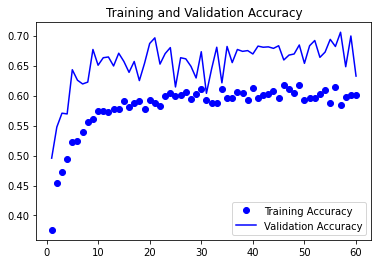

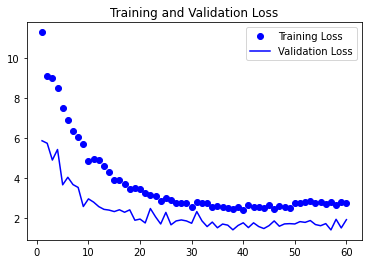

In [ ]:
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

In [ ]:
# Test the model
test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col='filename',
        y_col='label',
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical',
        shuffle=False
        )

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
print('test loss:', test_loss)


Found 20356 validated image filenames belonging to 39 classes.
    1/20356 [..............................] - ETA: 34:47 - loss: 0.1232 - acc: 1.0000

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1139: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


20356/20356 [==============================] - 162s 8ms/step - loss: 2.0040 - acc: 0.6317
test acc: 0.631705641746521
test loss: 2.0040297508239746


20356/20356 [==============================] - 96s 5ms/step


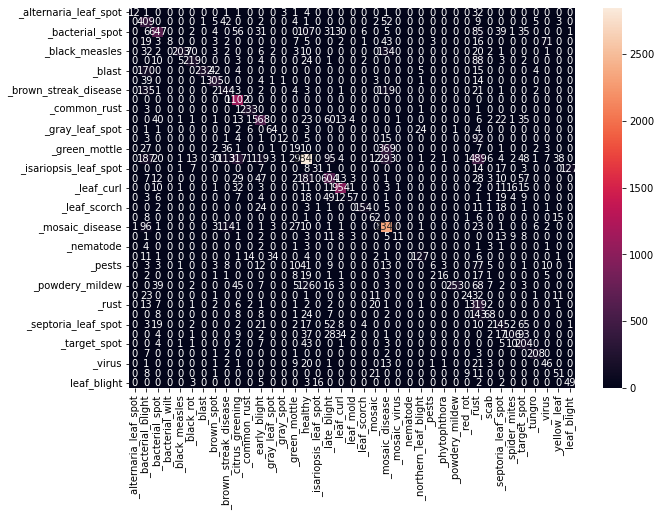

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [ ]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

                       precision    recall  f1-score   support

_alternaria_leaf_spot       0.92      0.21      0.35        56
    _bacterial_blight       0.33      0.76      0.47       535
      _bacterial_spot       0.77      0.60      0.67      1086
      _bacterial_wilt       1.00      0.04      0.08       183
       _black_measles       0.95      0.41      0.58       491
           _black_rot       0.68      0.61      0.64       361
               _blast       0.99      0.49      0.66       472
          _brown_spot       0.74      0.83      0.78       369
_brown_streak_disease       0.31      0.33      0.32       438
     _citrus_greening       0.67      1.00      0.80      1102
         _common_rust       0.91      0.97      0.94       239
        _early_blight       0.64      0.72      0.68       792
      _gray_leaf_spot       0.59      0.60      0.60       106
           _gray_spot       0.71      0.09      0.16       133
        _green_mottle       0.14      0.04      0.06  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("top-5-accuracy")